In [26]:
pip install scikit-learn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=bd90d2923ad503d4a4bc6de7e0eb8c239278a7d82c933984c713ee4a0d37ae44
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\23\9d\42\5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn


ERROR: Exception:
Traceback (most recent call last):
  File "E:\Python\envs\gpuenv\lib\site-packages\pip\_internal\cli\base_command.py", line 173, in _main
    status = self.run(options, args)
  File "E:\Python\envs\gpuenv\lib\site-packages\pip\_internal\cli\req_command.py", line 203, in wrapper
    return func(self, options, args)
  File "E:\Python\envs\gpuenv\lib\site-packages\pip\_internal\commands\install.py", line 399, in run
    pycompile=options.compile,
  File "E:\Python\envs\gpuenv\lib\site-packages\pip\_internal\req\__init__.py", line 81, in install_given_reqs
    pycompile=pycompile,
  File "E:\Python\envs\gpuenv\lib\site-packages\pip\_internal\req\req_install.py", line 766, in install
    requested=self.user_supplied,
  File "E:\Python\envs\gpuenv\lib\site-packages\pip\_internal\operations\install\wheel.py", line 802, in install_wheel
    requested=requested,
  File "E:\Python\envs\gpuenv\lib\site-packages\pip\_internal\operations\install\wheel.py", line 676, in _install_wh

  Using cached scikit_learn-0.24.2-cp36-cp36m-win_amd64.whl (6.8 MB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached scipy-1.5.4-cp36-cp36m-win_amd64.whl (31.2 MB)



In [1]:
import helper

In [2]:
from helper import *

In [3]:
import os
import tensorflow as tf
train_dir = "E:\\3rd Year\\T9\\AI\\Mini Project\\New_Data\\train"
test_dir = "E:\\3rd Year\\T9\\AI\\Mini Project\\New_Data\\test"

In [4]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)

class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['Blank', 'Not_Blank'], dtype='<U9')

In [5]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size = (224,224),
                                                                 batch_size = 32,
                                                                 label_mode = "binary")

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=(224,224),
                                                                batch_size = 32,
                                                                label_mode = "binary",
                                                                shuffle = False)

Found 80852 files belonging to 2 classes.
Found 26959 files belonging to 2 classes.


In [6]:
from tensorflow.keras import layers 
from tensorflow.keras.layers.experimental import preprocessing

# InceptionV3

In [7]:
# Setup the Base Model
base_model = tf.keras.applications.inception_v3.InceptionV3(include_top=False)
base_model.trainable = False

# Setup model architecture
inputs = layers.Input(shape=(224,224,3), name="input_shape")
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="Global_Average_Pooling")(x)
outputs = layers.Dense(1, activation="sigmoid", name="Output_Layer")(x)
transfer_model_1 = tf.keras.Model(inputs, outputs)

# Resnet101

In [8]:
# Setup the Base Model
base_model_1 = tf.keras.applications.resnet.ResNet101(include_top=False)
base_model_1.trainable = False

# Setup model architecture
inputs1 = layers.Input(shape=(224,224,3), name="input_shape")
x1 = base_model_1(inputs1, training=False)
x1 = layers.GlobalAveragePooling2D(name="Global_Average_Pooling")(x1)
outputs1 = layers.Dense(1, activation="sigmoid", name="Output_Layer")(x1)
transfer_model_2 = tf.keras.Model(inputs1, outputs1)

In [9]:
transfer_model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_shape (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, None, None, 2048)  21802784  
_________________________________________________________________
Global_Average_Pooling (Glob (None, 2048)              0         
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 2049      
Total params: 21,804,833
Trainable params: 2,049
Non-trainable params: 21,802,784
_________________________________________________________________


In [10]:
transfer_model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_shape (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet101 (Functional)       (None, None, None, 2048)  42658176  
_________________________________________________________________
Global_Average_Pooling (Glob (None, 2048)              0         
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 2049      
Total params: 42,660,225
Trainable params: 2,049
Non-trainable params: 42,658,176
_________________________________________________________________


In [11]:
transfer_model_1.compile(loss="binary_crossentropy",
                         optimizer = "adam",
                         metrics=["accuracy"])

In [13]:
transfer_history_1 = transfer_model_1.fit(train_data,
                                          epochs = 50,
                                          steps_per_epoch = len(train_data),
                                          validation_data = test_data,
                                          validation_steps = (len(test_data)),
                                          callbacks = callbacks)

Epoch 1/50
2527/2527 [==============================] - 866s 329ms/step - loss: 0.7802 - accuracy: 0.7250 - val_loss: 0.9723 - val_accuracy: 0.6682

Epoch 00001: val_loss improved from inf to 0.97228, saving model to C:\GPU\Saved_models\InceptionV3
INFO:tensorflow:Assets written to: C:\GPU\Saved_models\InceptionV3\assets
Epoch 2/50
2527/2527 [==============================] - 750s 294ms/step - loss: 0.6475 - accuracy: 0.7537 - val_loss: 0.4971 - val_accuracy: 0.7934

Epoch 00002: val_loss improved from 0.97228 to 0.49711, saving model to C:\GPU\Saved_models\InceptionV3
INFO:tensorflow:Assets written to: C:\GPU\Saved_models\InceptionV3\assets
Epoch 3/50
2527/2527 [==============================] - 720s 284ms/step - loss: 0.6155 - accuracy: 0.7613 - val_loss: 0.5091 - val_accuracy: 0.7933

Epoch 00003: val_loss did not improve from 0.49711
Epoch 4/50
2527/2527 [==============================] - 679s 268ms/step - loss: 0.5905 - accuracy: 0.7660 - val_loss: 0.7199 - val_accuracy: 0.7480

E

In [14]:
transfer_model_1.evaluate(test_data)

843/843 [==============================] - 155s 184ms/step - loss: 0.7503 - accuracy: 0.7776


[0.7503418326377869, 0.7776252627372742]

In [12]:
callbacks = create_callbacks(early_stopping=True,
                             checkpoint=True,
                             monitor="val_accuracy",
                             patience = 5,
                             save_dir = "C:\\GPU\\Saved_models\\InceptionV3",
                             save_weights_only = False,
                             save_best_only = True,
                             save_freq = "epoch")

In [7]:
loaded_model1 = tf.keras.models.load_model("C:\\GPU\\Saved_models\\Resnet101")

In [47]:
loaded_model1.evaluate(test_data)

843/843 [==============================] - 384s 448ms/step - loss: 0.1925 - accuracy: 0.9175


[0.19252990186214447, 0.9175043702125549]

In [8]:
preds = loaded_model1.predict(test_data)

In [19]:
pred_classes = np.round(preds)

In [17]:
y_labels = []
for images, labels in test_data.unbatch():
  label = labels.numpy()
  y_labels.append(int(label[0]))

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_true = y_labels,
                            y_pred = pred_classes))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91     12181
           1       0.91      0.94      0.93     14778

    accuracy                           0.92     26959
   macro avg       0.92      0.91      0.92     26959
weighted avg       0.92      0.92      0.92     26959



In [15]:
# Older Method

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data from directories
train_data_1 = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "binary")

test_data_1 = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size=32,
                                             class_mode="binary")

Found 80852 images belonging to 2 classes.
Found 26959 images belonging to 2 classes.


In [37]:
pred_classes = pred_classes.squeeze()

int_pred_classes = []
for pred_class in pred_classes:
  int_pred_classes.append(int(pred_class))

int_pred_classes = np.array(int_pred_classes)


In [38]:
int_pred_classes = np.array(int_pred_classes)
int_pred_classes

array([0, 1, 1, ..., 1, 1, 1])

In [41]:
import pandas as pd
df = pd.DataFrame()
df["Filepath"] = test_data_1.filepaths
df["True_Label"] = test_data_1.labels 
df["Pred_Label"] = int_pred_classes

In [42]:
df.head()

,Filepath,True_Label,Pred_Label
0,E:\3rd Year\T9\AI\Mini Project\New_Data\test\B...,0,0
1,E:\3rd Year\T9\AI\Mini Project\New_Data\test\B...,0,1
2,E:\3rd Year\T9\AI\Mini Project\New_Data\test\B...,0,1
3,E:\3rd Year\T9\AI\Mini Project\New_Data\test\B...,0,0
4,E:\3rd Year\T9\AI\Mini Project\New_Data\test\B...,0,0


In [43]:
acc = 0
total = len(df)
for i in range(len(df)):
  if(df["True_Label"][i] == df["Pred_Label"][i]):
    acc = acc + 1

accuracy  = acc/total
accuracy

0.9175043584702697

In [44]:
wrong_instances = total - acc
wrong_instances

2224

In [45]:


def copy_image(image_path, destination_folder):
  shutil.copy(image_path, destination_folder)


In [46]:
destination_folder = "C:\\GPU\\Wrong Preds"
wrong_count = 0
for i in range(len(df)):
  if(df["True_Label"][i] != df["Pred_Label"][i]):
    wrong_count = wrong_count + 1
    file_path = df["Filepath"][i]
    copy_image(image_path=file_path,
               destination_folder=destination_folder)

In [47]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_pred=int_pred_classes,
                       y_true = y_labels))

[[10775  1406]
 [  818 13960]]


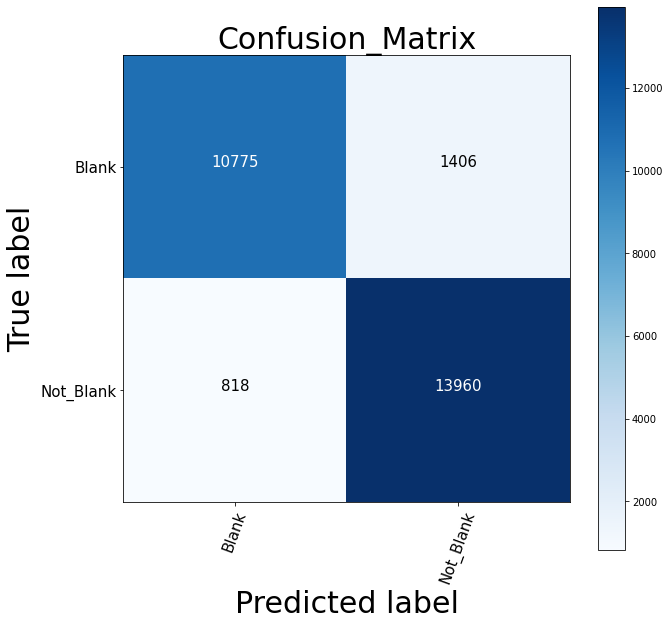

In [48]:
make_confusion_matrix(y_true = y_labels,
                      y_pred = int_pred_classes,
                      classes = class_names)

In [1]:
import glob
import shutil
import os

def copy_image(image_path, destination_folder):
  shutil.copy(image_path, destination_folder)

def rename_image(old_name, new_name):
  os.rename(old_name, new_name)

def rename_and_shift_wrong_preds(df, destination_folder):
  length = len(df)
  for i in range(length):
    if(df["True_Label"][i] != df["Pred_Label"][i]):
      file_path = df["Filepath"][i]
      copy_image(image_path=file_path,
                destination_folder=destination_folder)
      img_name = (df["Filepath"][i]).split("\\")[-1]
      new_path = destination_folder + "\\" + img_name
      pred_label = df["Pred_Label"][i]
      true_label = df["True_Label"][i]
      final_name = f"Pred[{pred_label}]_True[{true_label}]_{img_name}"
      final_path = destination_folder + "\\" + final_name + ".jpg"
      print(f"Copying {img_name} to destination folder and Renaming it to {final_name}")
      rename_image(old_name=new_path,
                   new_name=final_path)
